In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/tft.ipynb)


[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/tft.ipynb)

## Temporal Fusion Transformer

This notebook shows usage of temporal fusion transformer model. The TFT model was developed by a team from Google led by [Lim et al](https://doi.org/10.1016/j.ijforecast.2021.03.012). This neural network architecture combines the power of LSTM for extract temporal features from time series data and transformer architecture to further compliment LSTM and make the architecture interpretable. Although the TFT model can take both categorical and numerical features but in this notebook we will consider only numerical features.

In [1]:
# Some features used in this notebook are not available in the latest release of ai4water from pip which is 1.06
# at the moment. They will be available in ai4water's next release in 1.07. Since 1.07 is not currently available on
# pip, we will install ai4water from github using the following command.

# try:
#     import ai4water
# except (ImportError, ModuleNotFoundError):
#     !pip install git+https://github.com/AtrCheema/AI4Water.git@50ec3cf6ec281de104ca85f9f748dd0367235f62

In [41]:

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
from easy_mpl import imshow

from ai4water import Model
from ai4water.datasets import MtropicsLaos
from ai4water.utils.utils import get_version_info


In [2]:

for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.7.7 (default, Apr 15 2020, 05:09:04) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.07
lightgbm version: 3.2.1
catboost version: 0.26
xgboost version: 1.2.1
easy_mpl version: 0.21.3
SeqMetrics version: 1.3.4
tensorflow version: 1.15.0
tensorflow.python.keras.api._v1.keras version: 2.2.4-tf
torch version: 1.8.1+cpu
numpy version: 1.18.1
pandas version: 1.3.5
matplotlib version: 3.1.3
h5py version: 2.10.0
sklearn version: 0.22.2.post1
shapefile version: 2.1.3
fiona version: 1.8.11
xarray version: 0.19.0
netCDF4 version: 1.5.6
optuna version: 2.7.0
skopt version: 0.7.4
plotly version: 4.14.1
seaborn version: 0.10.0


In [3]:
from ai4water import Model
from ai4water.models import TFT
from ai4water.datasets import CAMELS_AUS

In [4]:
dataset = CAMELS_AUS(path="F:\\data\\CAMELS\\CAMELS_AUS")

In [5]:
inputs = ['et_morton_point_SILO',
           'precipitation_AWAP',
           'tmax_AWAP',
           'tmin_AWAP',
           'vprp_AWAP',
           'rh_tmax_SILO',
           'rh_tmin_SILO'
          ]

outputs = ['streamflow_MLd']

data = dataset.fetch('401203', dynamic_features=inputs+outputs, as_dataframe=True)

data = data.unstack()
data.columns = [a[1] for a in data.columns.to_flat_index()]
data.shape

(21184, 8)

In [6]:
skew_inputs = [
               'precipitation_AWAP',
           'rh_tmin_SILO'
]
normal_inputs = ['et_morton_point_SILO',
           'tmax_AWAP',
           'tmin_AWAP',
           'vprp_AWAP',
           'rh_tmax_SILO',
          ]

In [8]:
model = Model(
    model = TFT(
        input_shape=(15, len(inputs)),
        hidden_units=80,
        num_heads=6
    ),
    input_features=inputs,
    output_features=outputs,
    epochs=700,
    ts_args={'lookback': 15},
    lr = 1.8928566321671455e-05,
    batch_size = 16,
    x_transformation=[{'method': 'robust', 'features': normal_inputs},
                      {'method': 'log', "replace_zeros": True, 'features': skew_inputs}],
    y_transformation={'method': 'robust', 'features': outputs},
)


            building DL model for  
            regression problem using Model
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 15, 7)]      0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 15, 7)]      0           Input[0][0]                      
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 15, 1)]      0           tf_op_layer_strided_slice[0][0]  
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 15, 1)]      0           tf_op_layer_strided_slice[0][0]  
____________

"dot" with args ['-Tpng', 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmpxl5tex93'] returned code: 3221225477

stdout, stderr:
 b''
b''

dot plot of model could not be plotted due to 3221225477


***** Training *****
input_x shape:  (11854, 15, 7)
target shape:  (11854, 1)
***** Validation *****
input_x shape:  (2964, 15, 7)
target shape:  (2964, 1)
***** Validation *****
input_x shape:  (2964, 15, 7)
target shape:  (2964, 1)
Train on 14818 samples, validate on 2964 samples
Epoch 1/700
14818/14818 [==============================] - 63s 4ms/sample - loss: 1.1116 - val_loss: 0.8407
Epoch 2/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.7710 - val_loss: 0.6449
Epoch 3/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.6615 - val_loss: 0.6449
Epoch 4/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.5971 - val_loss: 0.4967
Epoch 5/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.5685 - val_loss: 0.4804
Epoch 6/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.5430 - val_loss: 0.4465
Epoch 7/700
14818/14818 [==============================] - 46s 3ms/sa

Epoch 148/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1591 - val_loss: 0.1399
Epoch 149/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1542 - val_loss: 0.1513
Epoch 150/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1609 - val_loss: 0.1630
Epoch 151/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1533 - val_loss: 0.1461
Epoch 152/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1601 - val_loss: 0.1557
Epoch 153/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1551 - val_loss: 0.1346
Epoch 154/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1522 - val_loss: 0.1491
Epoch 155/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.1502 - val_loss: 0.1351
Epoch 156/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.1550 - val_loss: 0.1400
Epoch 157/

14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0792 - val_loss: 0.0656
Epoch 297/700
14818/14818 [==============================] - 44s 3ms/sample - loss: 0.0815 - val_loss: 0.0615
Epoch 298/700
14818/14818 [==============================] - 45s 3ms/sample - loss: 0.0767 - val_loss: 0.0658
Epoch 299/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0816 - val_loss: 0.0649
Epoch 300/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0797 - val_loss: 0.0608
Epoch 301/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0788 - val_loss: 0.0622
Epoch 302/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.0783 - val_loss: 0.0607
Epoch 303/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0807 - val_loss: 0.0687
Epoch 304/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0780 - val_loss: 0.0621
Epoch 305/700
14818/1481

14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0494 - val_loss: 0.0339
Epoch 445/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0477 - val_loss: 0.0327
Epoch 446/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.0470 - val_loss: 0.0326
Epoch 447/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0482 - val_loss: 0.0451
Epoch 448/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0483 - val_loss: 0.0323
Epoch 449/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0485 - val_loss: 0.0371
Epoch 450/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0480 - val_loss: 0.0379
Epoch 451/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0479 - val_loss: 0.0327
Epoch 452/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0466 - val_loss: 0.0352
Epoch 453/700
14818/1481

14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0319 - val_loss: 0.0219
Epoch 593/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0309 - val_loss: 0.0222
Epoch 594/700
14818/14818 [==============================] - 48s 3ms/sample - loss: 0.0319 - val_loss: 0.0214
Epoch 595/700
14818/14818 [==============================] - 46s 3ms/sample - loss: 0.0332 - val_loss: 0.0244
Epoch 596/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0326 - val_loss: 0.0245
Epoch 597/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0317 - val_loss: 0.0212
Epoch 598/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0320 - val_loss: 0.0233
Epoch 599/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0312 - val_loss: 0.0204
Epoch 600/700
14818/14818 [==============================] - 47s 3ms/sample - loss: 0.0318 - val_loss: 0.0238
Epoch 601/700
14818/1481

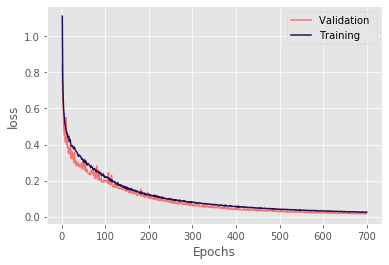

********** Successfully loaded weights from weights_695_0.01510.hdf5 file **********


In [9]:
h = model.fit_on_all_training_data(data=data)

In [11]:
model.evaluate_on_training_data(data=data, metrics=["r2", "rmse", "nse"])

***** Training *****
input_x shape:  (11854, 15, 7)
target shape:  (11854, 1)
11854/11854 [==============================] - 8s 706us/sample


{'r2': 0.9897681580986154,
 'rmse': 139.5351098290319,
 'nse': 0.9896673645075371}

In [12]:
model.evaluate_on_test_data(data=data, metrics=["r2", "rmse", "nse"])

***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)
6352/6352 [==============================] - 4s 587us/sample


{'r2': 0.6147775425572483,
 'rmse': 780.0106970420342,
 'nse': 0.6143773584544838}

***** Training *****
input_x shape:  (11854, 15, 7)
target shape:  (11854, 1)
11854/11854 [==============================] - 8s 674us/sample


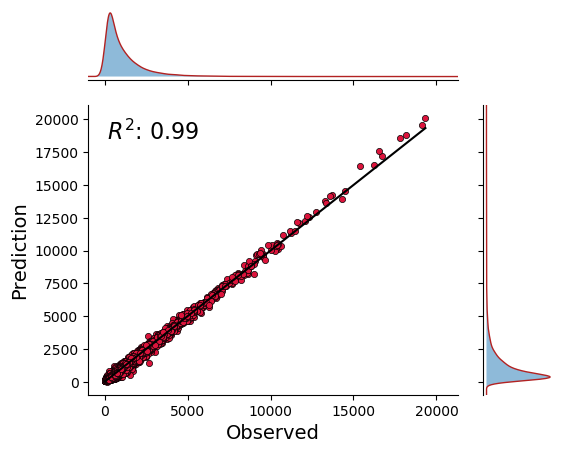

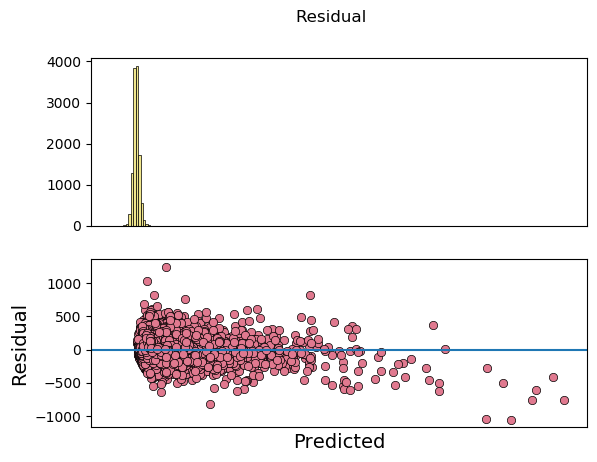

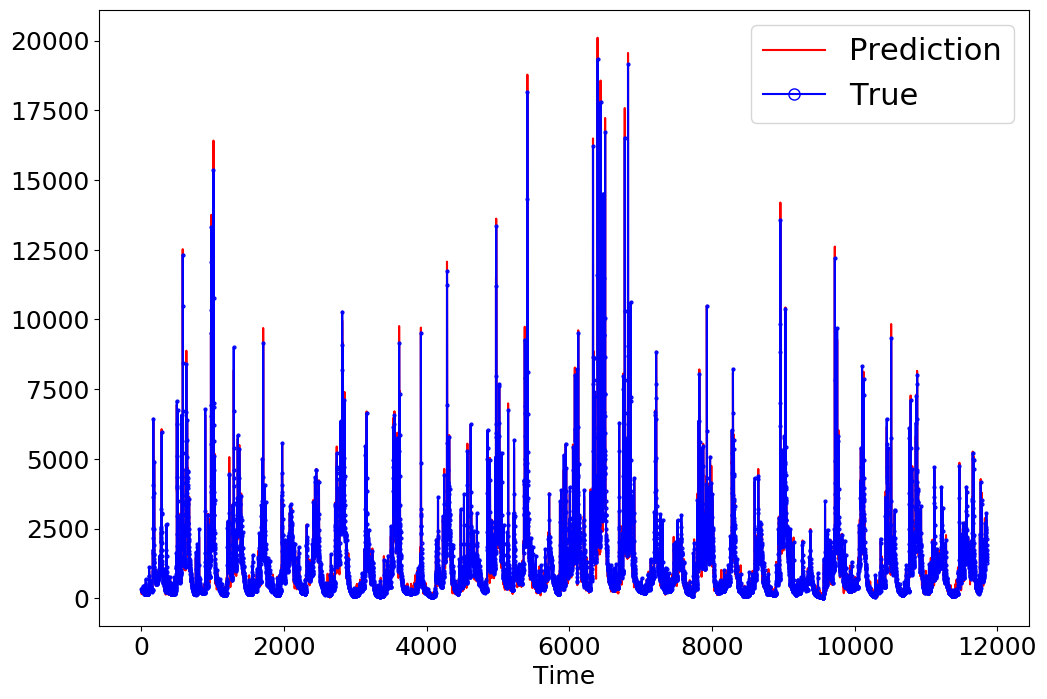

In [15]:
test_pred = model.predict_on_training_data(data=data, plots=["regression", "residual", "prediction"])

***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)
6352/6352 [==============================] - 4s 646us/sample


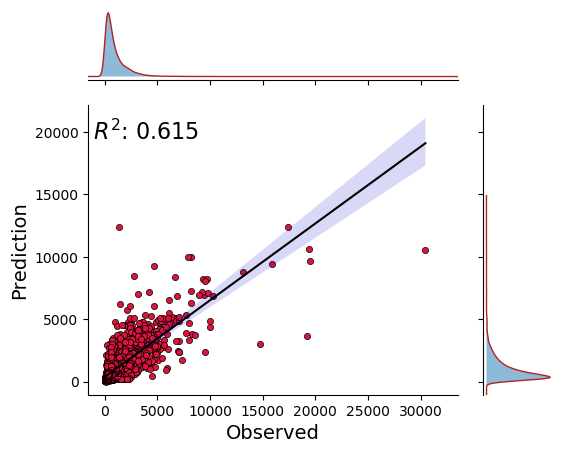

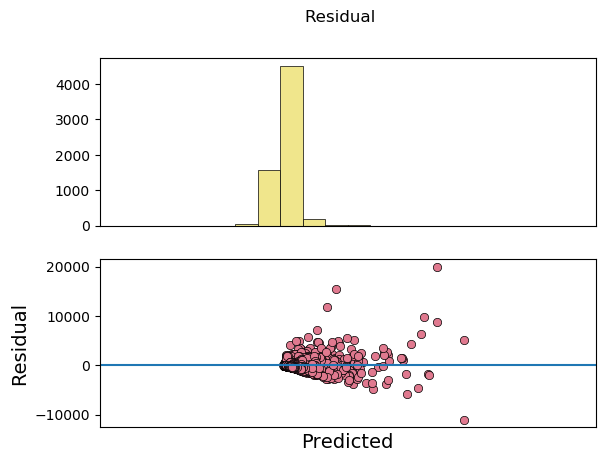

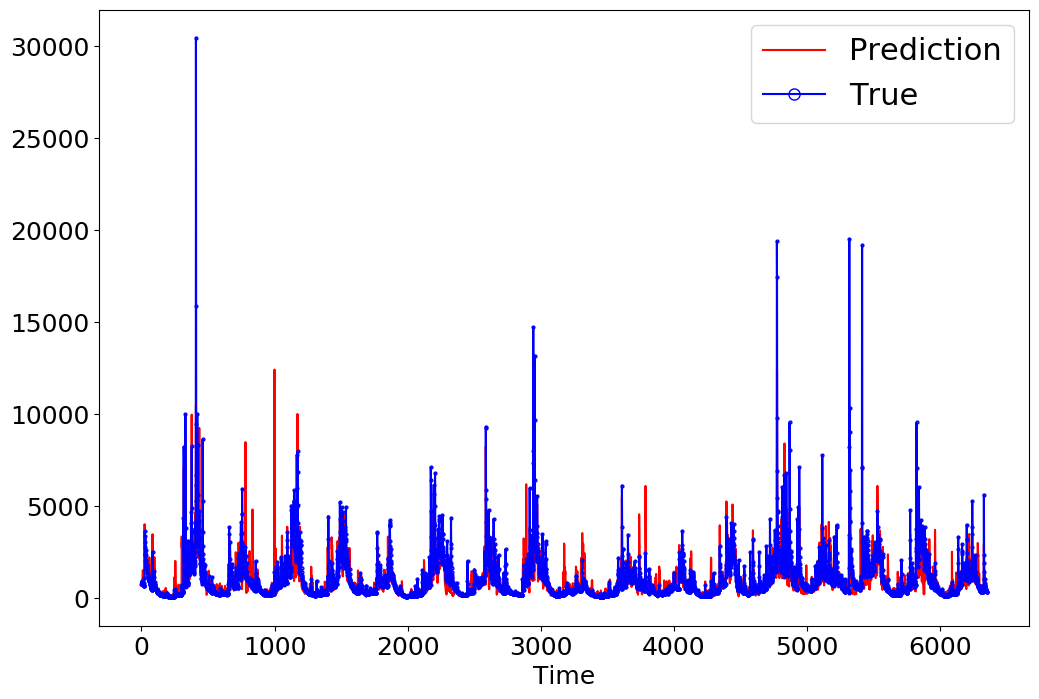

In [16]:
test_pred = model.predict_on_test_data(data=data, plots=["regression", "residual", "prediction"])

In [7]:
from ai4water.postprocessing import Interpret

In [10]:
interpreter = Interpret(model=model)

***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)
***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)


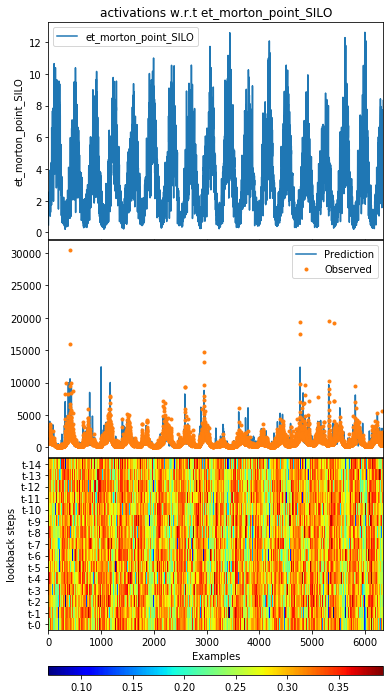

In [11]:
interpreter.interpret_tft(
    data=data,
    data_type="test",
    feature="et_morton_point_SILO",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)
***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)


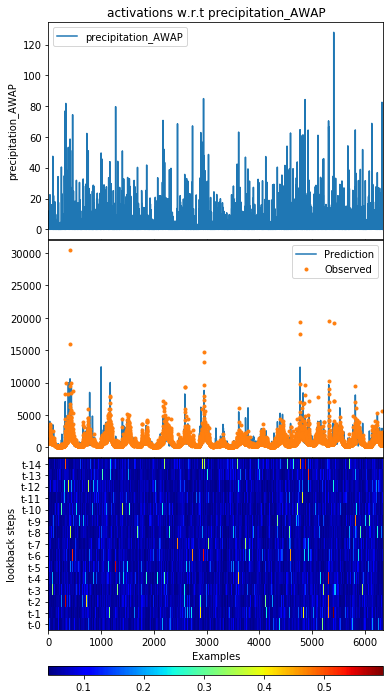

In [12]:
ax = interpreter.interpret_tft(
    data=data,
    data_type="test",
    feature="precipitation_AWAP",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

In [13]:
test_x, test_y = model.test_data(data=data)


***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)


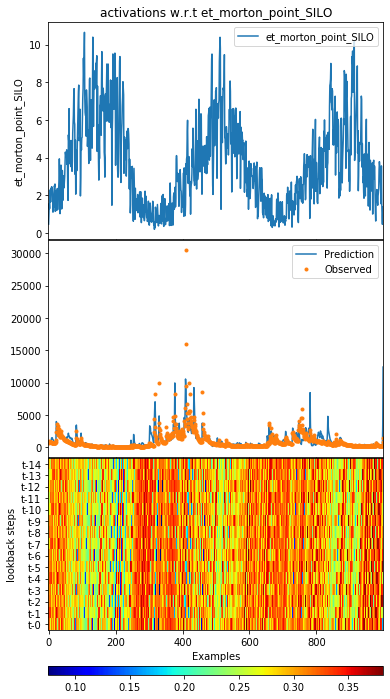

In [15]:

axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="et_morton_point_SILO",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

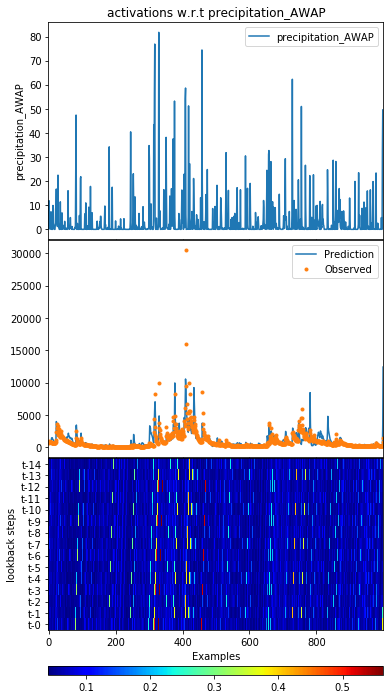

In [16]:
axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="precipitation_AWAP",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

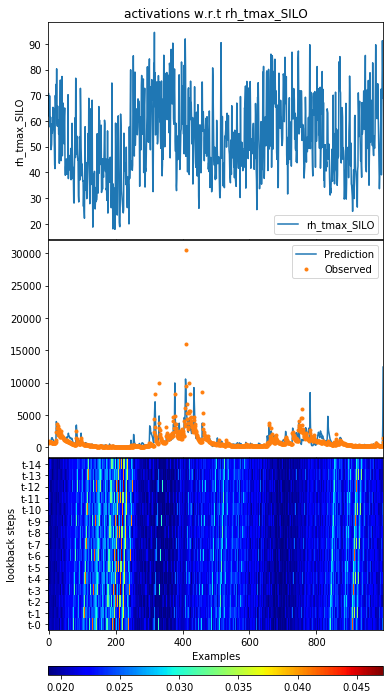

In [17]:
axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="rh_tmax_SILO",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

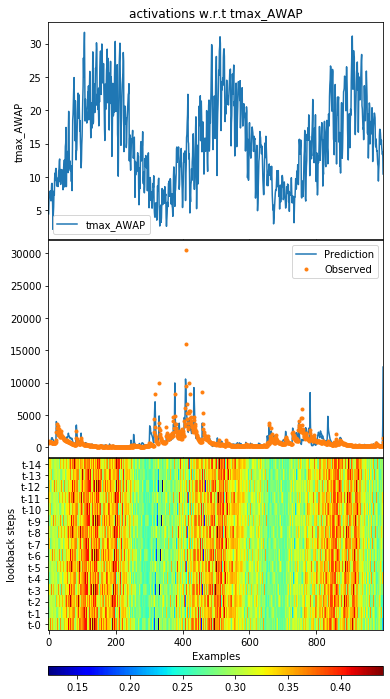

In [18]:
axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="tmax_AWAP",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

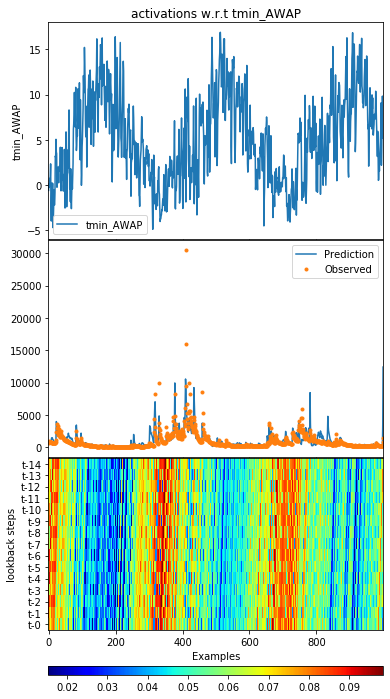

In [19]:
axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="tmin_AWAP",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

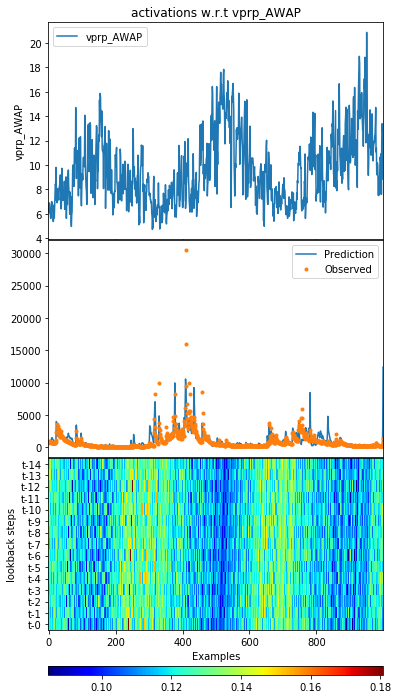

In [20]:
axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="vprp_AWAP",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

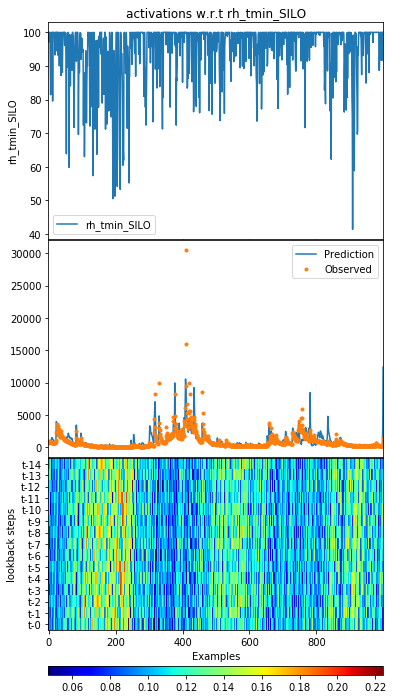

In [21]:
axes = interpreter.interpret_tft(
    x=test_x[0:1000],
    y=test_y[0:1000],
    feature="rh_tmin_SILO",
    cbar_params={"pad": 0.5, "border": False}, cmap="jet"
)

In [26]:
attention_weights, _ = interpreter.tft_attention_components(
    data=data,
    data_type="test")

***** Test *****
input_x shape:  (6352, 15, 7)
target shape:  (6352, 1)


In [27]:
for k,v in attention_weights.items():
    print(k, v.shape)

decoder_self_attn (6, 6352, 15, 15)
encoder_variable_selection_weights (6352, 15, 7)


In [33]:


enc_weights = attention_weights['encoder_variable_selection_weights']


In [40]:
enc_weights_avg_lb = np.mean(enc_weights, axis=1)
enc_weights_avg_lb.shape

(6352, 7)

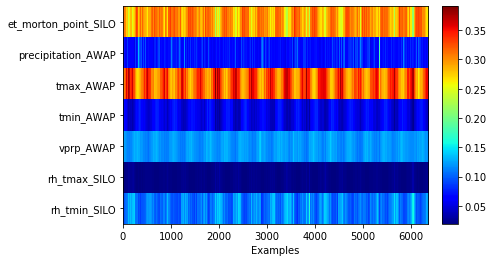

In [39]:
_ = imshow(enc_weights_avg_lb.transpose(), 
       colorbar=True, cmap="jet", 
       cbar_params={"border": False},
      aspect="auto",
       yticklabels=model.input_features,
       ax_kws=dict(xlabel="Examples"),
      )